#Imports

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import glob
import os
import scipy.io
drive.mount('/content/drive')

Mounted at /content/drive


#Download the Dataset and Understand the Format

In [ ]:
# plt.close('all')
# image=Image.open('test.jpg')
# plt.imshow(image)
# plt.axis('off');



In [ ]:
# array=np.array(image.getdata())
# array=array.astype(np.uint8)
# array=np.reshape(array,(717,1215,3))
# im = Image.fromarray(array)
# plt.imshow(im)
# plt.axis('off');

##Display Image With its Groundtruth Segmentation

In [ ]:
def display_image_from_path(image_path):
  image=Image.open(image_path)
  groundtruth=Image.open(groundtruth_path)

  plt.figure()
  plt.imshow(image);
  plt.title('Image')
  plt.axis('off');

In [ ]:
def display_ground_truth_from_path(groundtruth_path):
  mat = scipy.io.loadmat(groundtruth_path)
  segmentations=mat['groundTruth']
  for i in range (segmentations.shape[1]):
    data=segmentations[0][i][0][0]
    for j in range (2):
      seg_data=data[j]
      array=np.array(seg_data)
      array=array.astype(np.uint8)
      im = Image.fromarray(array)
      plt.figure()
    
      plt.imshow(im)
      plt.axis('off');


In [ ]:
def display_image_with_ground_truth_from_path(image_path,groundtruth_path):

  display_image_from_path(image_path)
  display_ground_truth_from_path(groundtruth_path)


In [ ]:
def display_image_from_array(image_array,image_dimensions):
  
  array=image_array
  array=array.astype(np.uint8)
  array=np.reshape(array,(image_dimensions[1],image_dimensions[0],3))
  im = Image.fromarray(array)
  plt.figure()
  plt.imshow(im)
  plt.axis('off');


In [ ]:
def reshape_image(image_array,image_dimensions):
  array=image_array
  array=array.astype(np.uint8)
  array=np.reshape(array,(image_dimensions[1],image_dimensions[0]))
  return array

In [ ]:
def display_ground_truth_from_array(groundtruth_array,image_dimensions,save=False,save_name=None):
      array=reshape_image(groundtruth_array,image_dimensions)
      array=array.astype(np.uint8)
      im = Image.fromarray(array)
      plt.figure()
      plt.imshow(im)
      plt.axis('off');
      if(save):
        plt.savefig(save_name)

In [ ]:
def display_ground_truth_from_array_colored(groundtruth_array,image_dimensions,save=False,save_name=None):
      array=reshape_image(groundtruth_array,image_dimensions)
      array=array.astype(np.uint8)
      im = Image.fromarray(array)
      colors={0:(247, 37, 133),1:(181, 23, 158),2:(114, 9, 183),3:(86, 11, 173),4:(72, 12, 168),5:(58, 12, 163),6:(63, 55, 201),7:(67, 97, 238),8:(72, 149, 239),9:(76, 201, 240),10:(255,255,255)}

      width, height = im.size
      
    

      # replace alpha channel with white color
      img = Image.new('RGB', im.size, (255, 255, 255))
      

     
      
      for i in range(width):
        for j in range(height):
            current_color = im.getpixel( (i,j) )
            img.putpixel((i,j),colors[current_color])
            
      



      plt.figure()
      plt.imshow(img)
      plt.axis('off');
      if(save):
        plt.savefig(save_name)

In [ ]:
def display_image_with_ground_truth_from_array(image_array,image_dimensions,groundtruth_arrays):
  display_image_from_array(image_array,image_dimensions)
  for groundtruth_array in groundtruth_arrays :
    display_ground_truth_from_array(groundtruth_array,image_dimensions)
  

In [ ]:
def get_ground_truth_as_dictionary(groundtruth_array):
  unique=np.unique(groundtruth_array)
  groundtruth_dictionary={}
  for i in range (unique.size):
    groundtruth_dictionary[unique[i]]=list()

  for i in range(groundtruth_array.shape[0]):
    for j in range (groundtruth_array.shape[1]):
      groundtruth_dictionary[groundtruth_array[i][j]].append((i,j))
  
  for i in range (unique.size):
    groundtruth_dictionary[unique[i]]=np.array(groundtruth_dictionary[unique[i]])
    
  return groundtruth_dictionary

In [ ]:
def get_data(number_of_images,images_path,groundtruth_path):
  

  image_number=[]

   
  files =glob.glob(images_path+'/*.jpg')

  for i in range(len(files)):
    image_number.append(int(os.path.splitext(os.path.basename(files[i]))[0]))
  image_number.sort()
  
  image_number=image_number[:number_of_images]



  dimensions=[]
  x = []
  y=[]
  groundtruth_dictionary=[]

  for img_num in image_number:
    filename=images_path+'/'+str(img_num)+'.jpg'
    im=Image.open(filename)
    image_sequence = im.getdata()
    image_array = np.array(image_sequence)  
    dimensions.append(im.size)
    x.append(image_array)
  

  for img_num in image_number:
    
    image_path=groundtruth_path+"/"+str(img_num)+".mat"
    mat = scipy.io.loadmat(image_path)
    segmentations=mat['groundTruth']
    segs=[]
    segs_dictionary=[]
    
    for i in range (segmentations.shape[1]):
      data=segmentations[0][i][0][0]
      
      for j in range (2):
        seg_data=data[j]
        array=np.array(seg_data)
        array=array.astype(np.uint8)
        segs.append(array.flatten())
        segs_dictionary.append(get_ground_truth_as_dictionary(array))

    y.append(np.array(segs))
    groundtruth_dictionary.append(segs_dictionary)

  image_number=np.array(image_number)
  x=np.array(x)
  y=np.array(y,dtype=object)
  groundtruth_dictionary=np.array(groundtruth_dictionary,dtype=object)

  return x,y,groundtruth_dictionary,image_number,dimensions

In [ ]:
number_of_images=50
images_path="/content/drive/MyDrive/prassignment2/images/test"
groundtruth_path="/content/drive/MyDrive/prassignment2/groundTruth/test"
x,y,groundtruth_dictionary,image_number,dimensions=get_data(number_of_images,images_path,groundtruth_path)

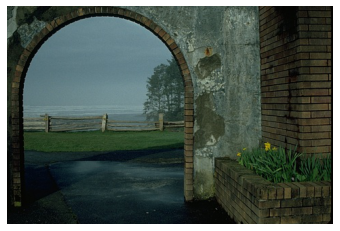

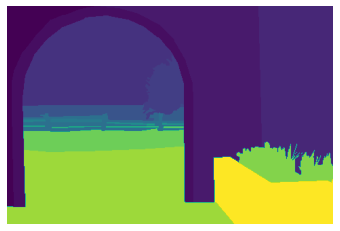

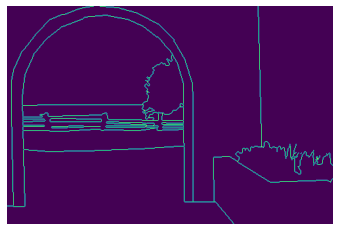

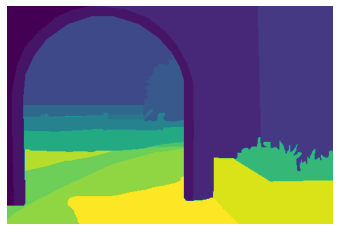

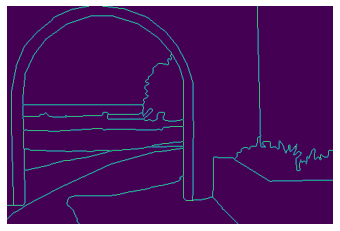

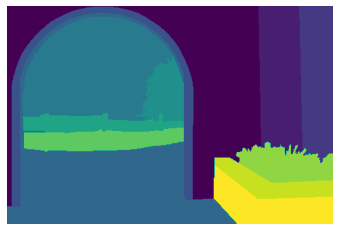

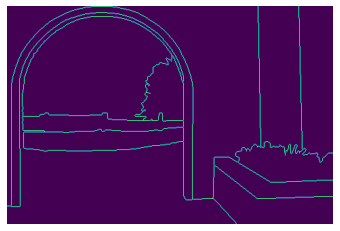

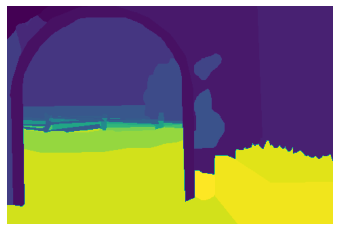

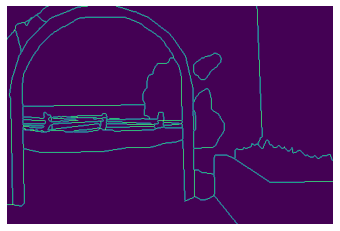

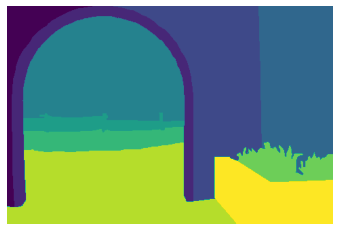

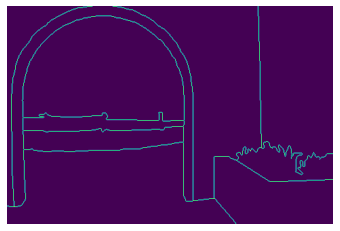

In [ ]:
display_image_with_ground_truth_from_array(x[2],dimensions[2],y[2])

# K-means Functions

In [ ]:
import math

In [ ]:
def get_initial_centroids(image,k):
  # if spatial == False:
  #   m = 3
  # else:
  #   m = 5
  rows,col = image.shape
  #print(rows)
  centroids = np.zeros((k,3))
  for i in range(k):
    index = int((i/k)*rows) +  int((rows/(2*k)))
    #print(index)
    centroids[i] = image[index]
  return centroids

In [ ]:
def square_dist(pixel_1,pixel_2):
  dist = math.pow( pixel_1[0]-pixel_2[0],2) + math.pow(pixel_1[1]-pixel_2[1],2) + math.pow(pixel_1[2]-pixel_2[2],2)
  return dist

In [ ]:
def assign_clusters(image,centroids):
  cluster_vector = np.zeros(image.shape[0])
  pixel_number = 0
  for i in image:
    #print(i)
    min = 3.402823466E+38 
    min_centroid = -1
    centroid_number = 0
    for j in centroids:
      dist = square_dist(i,j)
      if dist < min:
        min_centroid = centroid_number
        min = dist
      centroid_number += 1
    cluster_vector[pixel_number] = min_centroid
    pixel_number += 1
  return cluster_vector

In [ ]:
def assign_clusters_vectorized(image,centroids):
  cluster_vector = np.zeros(image.shape[0])
  pixel_number = 0
  for i in image:
    dist_2 = np.sum((centroids - i)**2, axis=1)
    min_dist =  np.argmin(dist_2)
    cluster_vector[pixel_number] = min_dist
    pixel_number += 1
  return cluster_vector

In [ ]:
def update_centroids(image,cluster_vector):
  # if spatial == False:
  #   m = 3
  # else:
  #   m = 5
  k = len(np.unique(cluster_vector))
  number_of_members = np.zeros(k)
  updated_centroids = np.zeros((k,3))
  for i in range(image.shape[0]):
    assigned_cluster = int(cluster_vector[i])
    updated_centroids[assigned_cluster] = updated_centroids[assigned_cluster] + image[i]
    number_of_members[assigned_cluster] = number_of_members[assigned_cluster] + 1
  for i in range(k):
    updated_centroids[i] = updated_centroids[i] / number_of_members[i]
  return updated_centroids

In [ ]:
def get_sum_SSE_centroids(new_centroids,old_centroids):
  number_of_clusters = new_centroids.shape[0]
  sum = 0
  for i in range(number_of_clusters):
    sum += square_dist(new_centroids[i],old_centroids[i])
  return sum

In [ ]:
def apply_K_means(image,k,tolerance = 1.,iterations = 50):
  initial_centroids = get_initial_centroids(image,k)
  clusters = assign_clusters_vectorized(image,initial_centroids)
  for i in range(iterations):
    # get new centroids
    updated_centroids = update_centroids(image,clusters)
    # get sum of sum of squared errors between new and old centroids
    sum_SSE_centroids = get_sum_SSE_centroids(updated_centroids,initial_centroids)
    #print(i) ################################
    if sum_SSE_centroids < tolerance:
      #print(sum_SSE_centroids) ################################
      #print(updated_centroids) ################################
      #print(initial_centroids) ################################
      print("centroids converged") ################################
      return clusters
    initial_centroids = updated_centroids
    clusters = assign_clusters_vectorized(image,updated_centroids)
  print("reached max iterations") ################################
  return clusters

In [ ]:
test_image = x[0]
final_test_clusters = apply_K_means(test_image,11,0.5)

KeyboardInterrupt: ignored

In [ ]:
display_ground_truth_from_array(final_test_clusters,dimensions[0],True,"/content/drive/MyDrive/KMEANS/ "+str(0)+".jpg")

#Getting Measures

In [ ]:
def countDist(arr):
  s=set()
  res=0
  for i in range(len(arr)):
    if arr[i] not in s:
      s.add(arr[i])
      res+=1
  return res


In [ ]:
def get_max(arr):
  maxx=-1
  result=-1
  for i in range(len(arr)):
    if maxx<arr[i]:
      maxx=arr[i]
      result=i
  return maxx,result

In [ ]:
def get_f_measure(ground_truth,samni):
  num_of_clusters_ground_truth=countDist(ground_truth)
  num_of_clusters_predicted=countDist(samni)
  #print(num_of_clusters_ground_truth)
  #print(num_of_clusters_predicted)
  matrix=np.zeros((num_of_clusters_predicted,num_of_clusters_ground_truth))
  ##making 2-d array to get data
 ## for i in range(num_of_clusters_predicted):
 ##   map=np.zeros(num_of_clusters_ground_truth)
 ##   for j in range(len(samni)):
 ##     if samni[j]==i:
 ##       matrix[i][ground_truth[j]]+=1
  for i in range(len(samni)):
    matrix[samni[i]][ground_truth[i]-1]+=1
  ## getting precision and recall
  #print(matrix)
  f_measure=np.zeros(num_of_clusters_predicted)
  col_totals = matrix.sum(axis=0)
  for i in range(num_of_clusters_predicted):
      maxx,index=get_max(matrix[i])
      precision=maxx/np.sum(matrix[i])
      recall=maxx/col_totals[index]
      f_measure[i]=(2*precision*recall)/(precision+recall)
      
  return np.sum(f_measure)/num_of_clusters_predicted

In [ ]:
import math
def get_conditional_entropy(ground_truth,samni):
  num_of_clusters_ground_truth=countDist(ground_truth)
  num_of_clusters_predicted=countDist(samni)
  #print(num_of_clusters_ground_truth)
  #print(num_of_clusters_predicted)
  matrix=np.zeros((num_of_clusters_predicted,num_of_clusters_ground_truth))
  ##making 2-d array to get data
  for i in range(len(samni)):
    matrix[samni[i]][ground_truth[i]-1]+=1
  conditional_entropies=np.zeros(num_of_clusters_predicted)
  row_totals = matrix.sum(axis=1)
  total=np.sum(row_totals)
  for i in range(num_of_clusters_predicted):
    result=0
    for j in range(num_of_clusters_ground_truth):
      if matrix[i][j]!=0:
        result+=(-1*(matrix[i][j]/row_totals[i])*(math.log(matrix[i][j]/row_totals[i],2))) 
    conditional_entropies[i] = result
  result=0
  for i in range(num_of_clusters_predicted):
    result+=(conditional_entropies[i]*(row_totals[i]/total))
  return result  


In [ ]:
num_of_clusters=[3,5,7,9,11]
averages_f=np.zeros(5)
averages_e=np.zeros(5)
results=list()
for i in range(4,5):
  print(i)
  result_avg=list()
  for z in range(5):
    print(z)
    predicted_image=apply_K_means(x[i],num_of_clusters[z],tolerance=2)
    display_ground_truth_from_array_colored(predicted_image,dimensions[i],True,"/content/drive/MyDrive/KMEANS/ "+str(i+1)+".jpg")
    avg_f_measure=0
    avg_conditional_entropy=0
    for j in range(len(y[i])):
      avg_f_measure+=get_f_measure(y[i][j],predicted_image.astype(int))
      avg_conditional_entropy+=get_conditional_entropy(y[i][j],predicted_image.astype(int))
    avg_f_measure/=len(y[i])
    avg_conditional_entropy/=len(y[i])
    print(avg_f_measure)
    averages_f[z]+=avg_f_measure
    print(averages_f[z])
    print(avg_conditional_entropy)
    averages_e[z]+=avg_conditional_entropy
    print(averages_e[z])
    result_avg.append([avg_f_measure,avg_conditional_entropy])
  results.append(result_avg)

for i in range(5):
  averages_f[i]/=50
  print(averages_f[i])
  averages_e[i]/=50
  print(averages_e[i])

In [ ]:
for i in range(5):
  averages_f[i]*=50
  print(averages_f[i])
  averages_e[i]*=50
  print(averages_e[i])

In [ ]:
for i in range (5):
    print(results[0][i][0],results[0][i][1],sep="\t")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#The Big Picture

##Part A

In [ ]:

#The set of five images will be the first five images in the test set
resulting_clusters=list()
for i in range (5):
  resulting_clusters.append(apply_K_means(x[i],5,0.5))
  print(get_f_measure(y[i][0],resulting_clusters[i].astype(int)))
  print(get_conditional_entropy(y[i][0],resulting_clusters[i].astype(int)))


  

In [ ]:
for i in range(5):
  display_ground_truth_from_array(resulting_clusters[i],dimensions[i],True,"KMEANS "+str(i+1)+".jpg")
  display_image_with_ground_truth_from_array(x[i],dimensions[i],y[i])

##Part B

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
im=Image.open("6046.jpg")
image_sequence = im.getdata()
image_array = np.array(image_sequence)  
dimensions=im.size


resulting_clusters=list()
clustering=SpectralClustering(n_clusters=5,n_neighbors=5,affinity='nearest_neighbors',random_state=0).fit(image_array)##change here
resulting_clusters.append(clustering.labels_)





In [ ]:

display_ground_truth_from_array(resulting_clusters[0],dimensions,True,"NCUT "+str(4)+".jpg")###change only dimensions and str 
#display_image_with_ground_truth_from_array(x[4],dimensions[4],y[4])##Change here

In [ ]:
def spatial_location(flattened_image_array,image_dimensions):
  result=flattened_image_array
  x_location=np.empty(flattened_image_array.shape[0])
  y_location=np.empty(flattened_image_array.shape[0])
  for i in range(flattened_image_array.shape[0]):
    x_location[i]=int(i/image_dimensions[0])
    y_location[i]=i%image_dimensions[0]
  result=np.append(result,x_location.reshape(x_location.shape[0],1).astype(int),axis=1)
  result=np.append(result,y_location.reshape(y_location.shape[0],1).astype(int),axis=1) 
  return result

In [ ]:
abc=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18]])
print(spatial_location(abc,(3,2)))